In [1]:
#  so all they want here is for us to use the nltk text thingy and do like the 5 things that they did above

# so: i need to get my txt files
# examine them using the nltk
# and probably just literally do what they did

In [2]:
#Excercise 2 will filter, stem, lemmatize, and then plot my corpora

In [3]:
# excercise 3 plays around with POS tagging

In [12]:
import os
import re
import uuid
import docx
import textract
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import json
import stanfordnlp
from spacy_stanfordnlp import StanfordNLPLanguage
import spacy
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

import requests #for http requests
import wordcloud #Makes word clouds
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import urllib.parse #For joining urls

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

snlp = stanfordnlp.Pipeline(lang="ru") 
nlp = StanfordNLPLanguage(snlp)


Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/Users/Leha/stanfordnlp_resources/ru_syntagrus_models/ru_syntagrus_tokenizer.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/Users/Leha/stanfordnlp_resources/ru_syntagrus_models/ru_syntagrus_tagger.pt', 'pretrain_path': '/Users/Leha/stanfordnlp_resources/ru_syntagrus_models/ru_syntagrus.pretrain.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/Users/Leha/stanfordnlp_resources/ru_syntagrus_models/ru_syntagrus_lemmatizer.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/Users/Leha/stanfordnlp_resources/ru_syntagrus_models/ru_syntagrus_parser.pt

In [13]:
corpus_name = '/Users/Leha/Desktop/Izvestia/Abby_Fine_Reader_Extracted_Text/zip'

def loadcorpus(corpus_name, corpus_style="text"):
    texts_raw = {}
    for file in os.listdir(corpus_name + "/"):
        if corpus_style in file:
            print(file)
            zfile = zipfile.ZipFile(corpus_name + "/" + file)
            for file in zfile.namelist():
                texts_raw[file] = []
                with zfile.open(file) as f:
                    for line in f:
                        texts_raw[file].append(line)
    return texts_raw

In [14]:
izvestiia_raw = loadcorpus(corpus_name) # so what I would want here is a all of my corpus in zip files, by year?

text.zip


In [15]:
izvestiia_raw['1997 Issue 133 July 18 Page 1.txt'][9:14]

[b'16 \xd0\xb8\xd1\x8e\xd0\xbb\xd1\x8f \xd0\xbf\xd1\x80\xd0\xb5\xd0\xb7\xd0\xb8\xd0\xb4\xd0\xb5\xd0\xbd\xd1\x82 \xd0\xa0\xd0\xbe\xd1\x81\xd0\xb8\xd0\xb8 \xd0\x91\xd0\xbe\xd1\x80\xd0\xb8\xd1\x81 \xd0\x95\xd0\xbb\xd1\x8c\xd1\x86\xd0\xb8\xd0\xbd \xd0\xb2\xd0\xbd\xd0\xb5\xd0\xb7\xd0\xb0\xd0\xbf\xd0\xbd\xd0\xbe \xd0\xbf\xd0\xbe\xd0\xb4\xd0\xbf\xd0\xb8\xd1\x81\xd0\xb0\xd0\xbb \xd0\xb2 \xd0\x9a\xd0\xb0\xd1\x80\xd0\xb5\xd0\xbb\xd0\xb8\xd0\xb8 \xd1\x80\xd1\x8f\xd0\xb4 \xd1\x83\xd0\xba\xd0\xb0\xd0\xb7\xd0\xbe\xd0\xb2, \xd0\xb7\xd0\xb0\xd0\xb6\xd0\xb8\xd0\xb3\xd0\xb0\xd1\x8e\xd1\x89\xd0\xb8\xd1\x85 \xc2\xab\xd0\xb7\xd0\xb5\xd0\xbb\xd0\xb5\xd0\xbd\xd1\x8b\xd0\xb9 \xd1\x81\xd0\xb2\xd0\xb5\xd1\x82\xc2\xbb \xd1\x80\xd0\xb5\xd1\x84\xd0\xbe\xd1\x80\xd0\xbc\xd0\xb5 \xd0\x92\xd0\xbe\xd0\xbe\xd1\x80\xd1\x83\xd0\xb6\xd0\xb5\xd0\xbd\xd0\xbd\xd1\x8b\xd1\x85 \xd1\x81\xd0\xb8\xd0\xbb \xd0\xa0\xd0\xbe\xd1\x81\xd1\x81\xd0\xb8\xd0\xb8. \xd0\xa3\xd1\x82\xd0\xb5\xd1\x87\xd0\xb5\xd0\xba \xd0\xbd\xd0\xb5 \xd0\xb1\xd1

In [16]:
def clean_raw_text(raw_texts):
    clean_texts = []
    for text in raw_texts:
        try:
            text = text.decode("utf-8")
            clean_text = text.replace("Росии", "России").replace("\r\n", "").replace("/t", "").replace("\t", "")
            clean_texts.append(clean_text)
        except AttributeError:
            # print("ERROR CLEANING")
            # print(text)
            continue
        except UnicodeDecodeError:
            # print("Unicode Error, Skip")
            continue
    clean_text = " ".join(clean_texts)
    return clean_text

In [17]:
clean = clean_raw_text(izvestiia_raw['1997 Issue 133 July 18 Page 1.txt'])

In [18]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [19]:
# seeing as how this returns the first line of the thingy, I might want to 
word_tokenize(clean)

../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


['\ufeffж',
 'Я',
 'НЕ',
 'НАСТОЛЬКО',
 'ПОДЛ',
 'ЧТОБЫ',
 'БЫТЬ',
 'ПЕССИМИСТОМ',
 'ПОКУПАЙТЕ',
 'СВЕЖИЙ',
 'НОМЕР',
 'ГАЗЕТЫ',
 'НЕДЕЛЯ',
 'Евгений',
 'ЕВТУШЕНКО',
 'Владимир',
 'ЗАЙНЕТДИНОВ',
 'Известия',
 'современная',
 'армия',
 'Виктор',
 'ЛИТОВКИН',
 'Известия',
 '16',
 'июля',
 'президент',
 'России',
 'Борис',
 'Ельцин',
 'внезапно',
 'подписал',
 'в',
 'Карелии',
 'ряд',
 'указов',
 'зажигающих',
 '«зеленый',
 'свет»',
 'реформе',
 'Вооруженных',
 'сил',
 'России',
 'Утечек',
 'не',
 'было',
 '18',
 'июля',
 '1997',
 'года',
 'пятница',
 'N8',
 '133',
 '24988',
 'Появилась',
 'надежда',
 'что',
 'у',
 'России',
 'будет',
 'Мы',
 'еще',
 'не',
 'забыли',
 'ряд',
 'трагических',
 'происшествий',
 'когда',
 'обваливались',
 'там',
 'и',
 'сям',
 'дома',
 'и',
 'гибли',
 'под',
 'обломками',
 'граждане',
 'Сообщения',
 'об',
 'этих',
 'ЧП',
 'стали',
 'привычными',
 'И',
 'все-таки',
 'По',
 'крайней',
 'мере',
 '7',
 'человек',
 'погибли',
 'и',
 '43',
 'ранены',
 'в',
 'резуль

In [20]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pd.DataFrame(countsForFrame)

In [21]:
countedWords = wordCounter(word_tokenize(clean))
countedWords[:10]

../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


,word,count
0,﻿ж,1
1,я,3
2,не,19
3,настолько,1
4,подл,1
5,чтобы,2
6,быть,1
7,пессимистом,1
8,покупайте,1
9,свежий,1


In [22]:
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:50]

,word,count
30,в,82
62,и,64
174,на,38
76,по,22
2,не,19
148,с,17
305,а,15
51,что,13
549,к,12
758,20,10


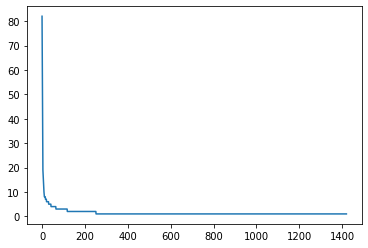

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
plt.show()

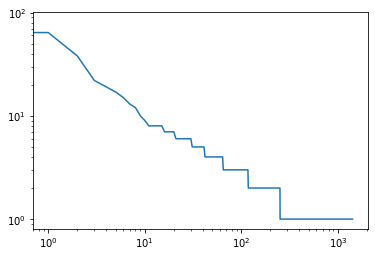

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [25]:
import nltk

In [26]:
izvestiiaTokens = word_tokenize(clean)

../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


In [27]:
izvestiiaText = nltk.Text(izvestiiaTokens)

In [28]:
izvestiiaIndex = nltk.text.ConcordanceIndex(izvestiiaText) 
izvestiiaIndex.print_concordance('России')

Displaying 6 of 6 matches:
 ЛИТОВКИН Известия 16 июля президент России Борис Ельцин внезапно подписал в Кар
еленый свет» реформе Вооруженных сил России Утечек не было 18 июля 1997 года пят
N8 133 24988 Появилась надежда что у России будет Мы еще не забыли ряд трагическ
ься до 10 человек В пресс-службе МЧС России рассказали что из Москвы в срочном п
 строят дачи» Борис Ельцин президент России 16 июля в Карелии после встречи с Ви
 Уфа Харьков Челябинск Гидрометцентр России 133И 0233 Ч35Ь 50.ВЯ1 ОКЯ 2,4 ОМ 3 н


In [160]:
stop_words_freq = []
for word, count in countedWords:
    if word == 'Whitehouse':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq

ValueError: too many values to unpack (expected 2)

In [161]:
countsDict = {}
for word in countedWords['word'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:20]

[('о', 1021),
 ('е', 821),
 ('а', 776),
 ('и', 753),
 ('н', 637),
 ('т', 611),
 ('с', 592),
 ('р', 559),
 ('в', 417),
 ('л', 382),
 ('м', 318),
 ('к', 308),
 ('д', 283),
 ('п', 270),
 ('у', 232),
 ('ы', 195),
 ('г', 180),
 ('я', 167),
 ('з', 147),
 ('б', 145)]

In [162]:
# i need to make a dataframe of multiple of my years

In [29]:
targetDir = '/Users/Leha/Desktop/Izvestia/Abby_Fine_Reader_Extracted_Text/1997_txt' #Change this to your own directory of texts
izvestiiaText = []
izvestiiaFileName = []

for file in (file for file in os.scandir(targetDir) if file.is_file() and not file.name.startswith('.')):
    with open(file.path, encoding="utf-8") as f:
        izvestiiaText.append(f.read())
    izvestiiaFileName.append(file.name)

In [30]:
izvestiia_df = pd.DataFrame({'text' : izvestiiaText}, index = izvestiiaFileName)

In [31]:
izvestiia_df['tokenized_text'] = izvestiia_df['text'].apply(lambda x: word_tokenize(x))

../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
../aten/src/ATe

In [32]:
izvestiia_df['word_counts'] = izvestiia_df['tokenized_text'].apply(lambda x: len(x))
izvestiia_df['word_counts']

1997 Issue 246 December 30 Page 9.txt      3529
1997 Issue 133 July 18 Page 3.txt          3922
1997 Issue 133 July 18 Page 2.txt          3431
1997 Issue 151 August 13 Page 6.txt        2836
1997 Issue 246 December 30 Page 8.txt      4076
1997 Issue 151 August 13 Page 4.txt        1764
1997 Issue 133 July 18 Page 1.txt          2253
1997 Issue 151 August 13 Page 5.txt        4756
1997 Issue 151 August 13 Page 1.txt        2178
1997 Issue 133 July 18 Page 5.txt          4337
1997 Issue 133 July 18 Page 4.txt          3658
1997 Issue 151 August 13 Page 2.txt        4155
1997 Issue 133 July 18 Page 6.txt          3990
1997 Issue 133 July 18 Page 7.txt          3064
1997 Issue 151 August 13 Page 3.txt        4733
1997 Issue 170 September 09 Page 10.txt    2030
1997 Issue 208 October 31 Page 6.txt       3929
1997 Issue 208 October 31 Page 7.txt       3222
1997 Issue 170 September 09 Page 11.txt    2500
1997 Issue 208 October 31 Page 5.txt       3040
1997 Issue 170 September 09 Page 8.txt  

In [33]:
countsDict = {}
for word in izvestiia_df['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:20]

[('в', 5529),
 ('и', 4644),
 ('на', 2716),
 ('не', 2080),
 ('с', 1641),
 ('что', 1422),
 ('по', 1216),
 ('В', 901),
 ('а', 858),
 ('из', 784),
 ('к', 762),
 ('о', 704),
 ('за', 683),
 ('как', 675),
 ('для', 648),
 ('от', 551),
 ('его', 513),
 ('1', 474),
 ('это', 462),
 ('России', 427)]

In [34]:
stop_words_freq = []
for word, count in word_counts:
    if word == 'России':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq

['в',
 'и',
 'на',
 'не',
 'с',
 'что',
 'по',
 'В',
 'а',
 'из',
 'к',
 'о',
 'за',
 'как',
 'для',
 'от',
 'его',
 '1',
 'это']

In [35]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [ ]:
izvestiia_df['normalized_tokens'] = izvestiia_df['tokenized_text'].apply(lambda x: normalizeTokens(x))

izvestiia_df['normalized_tokens_count'] = izvestiia_df['normalized_tokens'].apply(lambda x: len(x))

izvestiia_df

../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
../aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.
